# Bigskyearth - vaex - part 2
* Statistics
* Selections
* Virtual columns
* Units
* Exporting 
* Advanced plotting


* Statiscs available:
 * [Dataset.count](api.html#vaex.dataset.Dataset.count)
 * [Dataset.mean](api.html#vaex.dataset.Dataset.mean)
 * [Dataset.std](api.html#vaex.dataset.Dataset.std)
 * [Dataset.var](api.html#vaex.dataset.Dataset.var)
 * [Dataset.cov](api.html#vaex.dataset.Dataset.cov)
 * [Dataset.correlation](api.html#vaex.dataset.Dataset.correlation)
 * [Dataset.min](api.html#vaex.dataset.Dataset.min)
 * [Dataset.max](api.html#vaex.dataset.Dataset.max)
 * [Dataset.minmax](api.html#vaex.dataset.Dataset.minmax)
 * [Dataset.mutual_information](api.html#vaex.dataset.Dataset.mutual_information)
 * [Dataset.median_approx](api.html#vaex.dataset.Dataset.median_approx) (in progress)
 * [Dataset.percentile_approx](api.html#vaex.dataset.Dataset.percentile_approx) (in progress)
 * [Dataset.mode](api.html#vaex.dataset.Dataset.median) (in progress)

* Common arguments:
  * `binby`: List of expressions for constructing a binned grid
  * `limits`: description for the min and max values for the expressions, e.g. ‘minmax’, ‘99.7%’, [0, 10], or a list of, e.g. [[0, 10], [0, 20], ‘minmax’]
  * `shape`: shape for the array where the statistic is calculated on, if only an integer is given, it is used for all dimensions, e.g. shape=128, shape=[128, 256]
  * `selection`: Name of selection to use (or True for the 'default'), or all the data (when selection is None or False), or a list of selections
  * `async`: (advanced usage)
  * `progress`: set to True for a progress indicator, or pass a callable with signature f(fraction)

In [1]:
import vaex
%matplotlib inline

In [2]:
#ds = vaex.example()
ds = vaex.datasets.helmi_de_zeeuw.fetch()

In [3]:
ds

In [4]:
ds.count()

3300000.0

## Binby & shape
 * `binby`: List of expressions for constructing a binned grid.
 * `shape`: shape for the array where the statistic is calculated on, if only an integer is given, it is used for all dimensions, e.g. shape=128, shape=[128, 256]

In [5]:
x = ds.count(binby="x")
print(x.shape)
print(x)

(128,)
[    610.     720.     795.     895.     878.    1029.    1079.    1291.
    1348.    1443.    1588.    1682.    1879.    1970.    2076.    2212.
    2437.    2553.    2729.    3150.    3477.    3964.    4299.    4955.
    5432.    6081.    6687.    7404.    8047.    8410.    8912.    9451.
   10102.   10889.   11640.   12543.   13447.   14848.   15605.   16484.
   17824.   18823.   20122.   21552.   23361.   25631.   28080.   31074.
   35350.   40193.   45158.   50153.   55795.   61596.   67755.   74426.
   82154.   90403.   97112.  104041.  108200.  114921.  122999.  120551.
  122262.  121061.  112872.  107571.  102257.   95662.   88274.   80296.
   72367.   66055.   60061.   54574.   48829.   44049.   39138.   35392.
   30857.   27159.   23781.   20874.   18830.   17297.   16015.   15442.
   14561.   13668.   12742.   11612.   10860.   10087.    9375.    8825.
    8446.    7914.    7616.    7204.    7141.    6441.    5910.    5322.
    4923.    4486.    4156.    3671.    3297

In [6]:
c = ds.count(binby=["x", "y"], shape=3)
print(c.shape)
print(c)

(3, 3)
[[   42599.   155944.    64932.]
 [  209031.  2379703.   190857.]
 [   48112.   152069.    39037.]]


In [7]:
c = ds.count(binby=["x", "y"], shape=(4,3))
print(c.shape)
print(c)

(4, 3)
[[   18179.    65629.    24947.]
 [  121228.  1289485.   148339.]
 [  137236.  1267445.   104315.]
 [   23099.    65157.    17225.]]


## Limits
 * `limits`: description for the min and max values for the expressions, e.g. ‘minmax’, ‘99.7%’, [0, 10], or a list of, e.g. [[0, 10], [0, 20], ‘minmax’]

In [8]:
ds.count(binby="x", limits="minmax", shape=32)

array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.00000000e+00,   4.00000000e+00,   4.00000000e+00,
         7.00000000e+00,   2.70000000e+01,   8.38660000e+04,
         3.14433100e+06,   7.17040000e+04,   3.30000000e+01,
         1.00000000e+01,   7.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00])

In [9]:
_.sum()

3299999.0

In [10]:
ds.limits("x", "minmax"), ds.minmax("x")

(array([-309.714081,  734.977844]), array([-309.714081,  734.977844]))

In [11]:
ds.count(binby="x", limits="80%", shape=32)

array([  30149.,   33228.,   38212.,   44220.,   50445.,   56902.,
         63840.,   71550.,   79437.,   88906.,   98795.,  108081.,
        116741.,  122300.,  130935.,  140000.,  133938.,  139845.,
        129149.,  122122.,  115614.,  107377.,   97474.,   87543.,
         78081.,   70302.,   63250.,   56059.,   49689.,   43790.,
         38851.,   33190.])

In [12]:
limits_80= ds.limits("x", "80%")
print(limits_80)

[-8.34640817  7.89584753]


In [13]:
ds.count(binby="x", limits=limits_80, shape=32)

array([  30149.,   33228.,   38212.,   44220.,   50445.,   56902.,
         63840.,   71550.,   79437.,   88906.,   98795.,  108081.,
        116741.,  122300.,  130935.,  140000.,  133938.,  139845.,
        129149.,  122122.,  115614.,  107377.,   97474.,   87543.,
         78081.,   70302.,   63250.,   56059.,   49689.,   43790.,
         38851.,   33190.])

In [14]:
ds.count(binby="x", limits=[-10, 10], shape=32)

array([  27677.,   30554.,   34435.,   39075.,   45529.,   54494.,
         64086.,   74135.,   85099.,   97427.,  111494.,  126490.,
        140075.,  149701.,  162763.,  169851.,  170006.,  161869.,
        150286.,  139943.,  126498.,  111094.,   96727.,   84989.,
         74290.,   64018.,   54713.,   47048.,   38899.,   32613.,
         27358.,   24248.])

In [15]:
ds.count(binby=["x", "y"], limits=[-10, 10], shape=4)

array([[  40507.,   94324.,   98796.,   45593.],
       [  98480.,  366458.,  362679.,  103588.],
       [ 108006.,  363814.,  360579.,   98639.],
       [  55966.,   96984.,   91397.,   38688.]])

In [16]:
ds.count(binby=["x", "y"], limits=[[-10, 10], "minmax"], shape=(4,5))

array([[       0.,   368762.,     1223.,        0.,        0.],
       [       0.,  1041472.,     1428.,        0.,        0.],
       [       0.,  1039927.,     1485.,        0.,        0.],
       [       0.,   362006.,     1181.,        0.,        0.]])

## Selections
 *  `selection`: Name of selection to use (or True for the ‘default’), or all the data (when selection is None or False), a boolean expression (e.g. 'x > 0'), or a list of selections.

In [17]:
ds.select("x > 0") # default selection name is 'default'
ds.count(selection=True), ds.count(selection='default') # default

(1636950.0, 1636950.0)

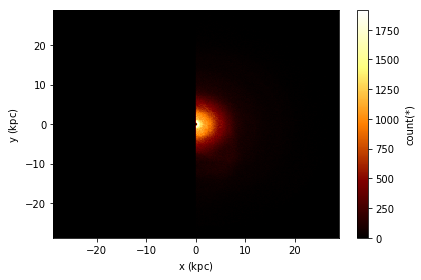

In [18]:
ds.plot("x", "y", selection=True)

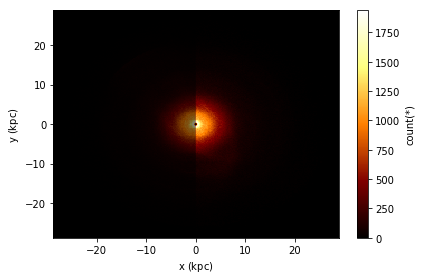

In [19]:
ds.plot("x", "y", selection=[False, True]) # multiple selections are by default 'faded'

In [20]:
ds.count(selection=[False, True])

array([ 3300000.,  1636950.])

In [21]:
ds.count(binby="x", shape=4, selection=[False, True])

array([[  109483.,  1562832.,  1512705.,   106076.],
       [       0.,    13719.,  1512705.,   106076.]])

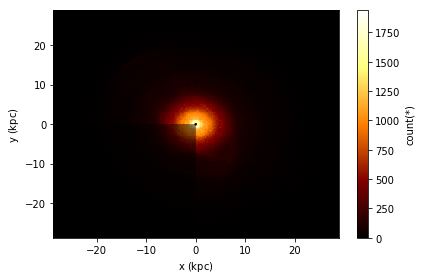

In [22]:
ds.select("x > 0")
ds.select("y > 0", mode="or") # logically combine
ds.plot("x", "y", selection=[False, True])

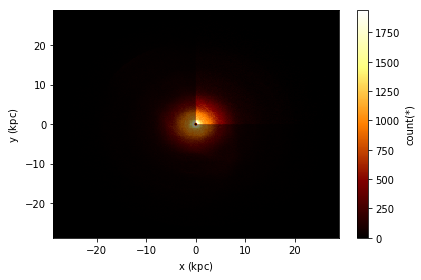

In [23]:
# named selections
ds.select("x > 0", name="xpos")
ds.select("y > 0", name="ypos")
ds.select("xpos & ypos") # selections can be referenced
ds.plot("x", "y", selection=[False, True])

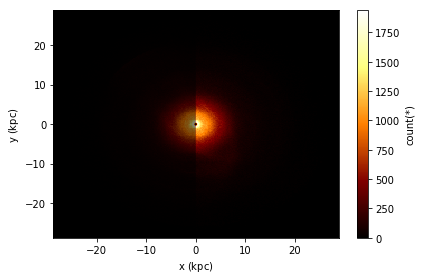

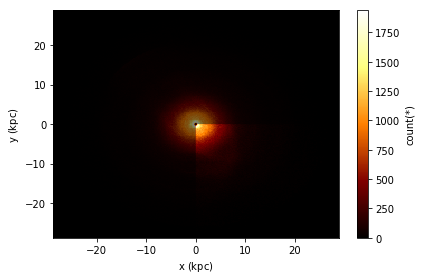

In [24]:
ds.plot("x", "y", selection=[False, "xpos"], show=True) # selection argument can refer to selection names
ds.plot("x", "y", selection=[False, "xpos & ~ypos"]) # and can be expressions

In [25]:
ds.count(selection=[False, "x > 0", "xpos", "xpos & (y > 0)"]) # can be combined in any style

array([ 3300000.,  1636950.,  1636950.,   781109.])

## Performance difference between names selections, and boolean expressions

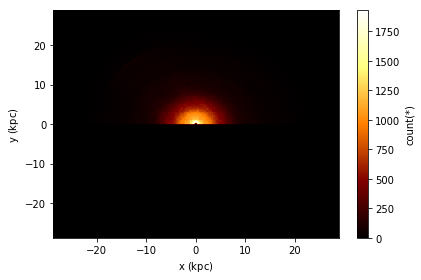

In [26]:
# difference between 'named'-selections and 
ds.select("arctan2(y,x) > 0") # arctan2 is an expensive function
ds.plot("x", "y", selection=True)

In [27]:
# name selections can be faster if used multiple times, since the resulting boolean masked is cached
ds.select("arctan2(y,x) > 0")

In [28]:
%%time
ds.count(selection=True)

CPU times: user 339 ms, sys: 40.4 ms, total: 379 ms
Wall time: 260 ms


1639271.0

In [29]:
%%timeit -r5
ds.count(selection=True)

10 loops, best of 5: 29.1 ms per loop


In [30]:
%%timeit -r5
ds.count(selection="arctan2(y,x) > 0")

1 loop, best of 5: 322 ms per loop


In [31]:
118/25.5

4.627450980392157

## Progress

In [32]:
expr = "+".join(["arctan2(x,y)"] * 50) # do a really expensive calculation
ds.count(expr, progress=True)

processing: 100% |############################################################################################| Time: 0:00:09 CPU Usage:   157%


3300000.0

In [33]:
def myprogress(f):
    print("progress at: %f" % f)
ds.count(progress=myprogress)

progress at: 0.000000
progress at: 0.250000
progress at: 0.500000
progress at: 0.750000
progress at: 1.000000


3300000.0

# Virtual columns

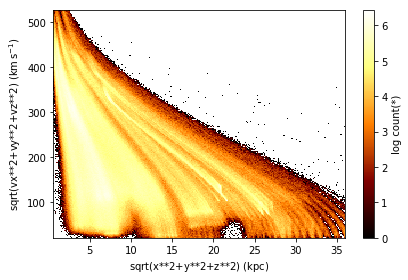

In [34]:
ds.plot("sqrt(x**2+y**2+z**2)", "sqrt(vx**2+vy**2+vz**2)", f="log")

In [35]:
ds.add_virtual_column("r", "sqrt(x**2+y**2+z**2)")
ds.add_virtual_column("v", "sqrt(vx**2+vy**2+vz**2)")

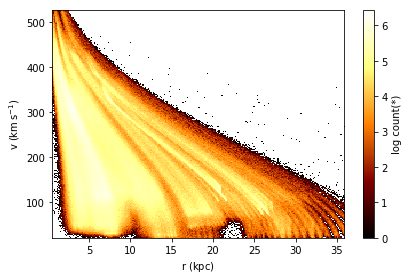

In [36]:
ds.plot("r", "v", f="log") # easier to reuse, and nice labels, units are correct!

Using $E = \frac{1}{2}v^2 + E_\text{pot}(\vec{x}) = E_\text{kin} + E_\text{pot}(\vec{x})$

$E_\text{pot}$ was not in our dataset, but we can add it ourselves. Note that `Epot` does not take up RAM.

In [37]:
ds.add_virtual_column("Ekin", "0.5*v**2")
ds.add_virtual_column("Epot", "E-Ekin")

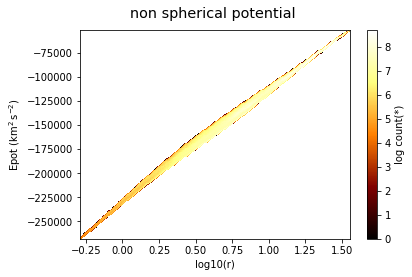

In [38]:
ds.plot("log10(r)", "Epot", f="log", title="non spherical potential")

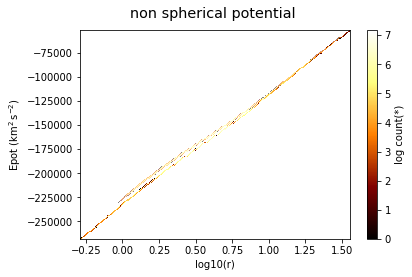

In [39]:
ds.plot("log10(r)", "Epot", f="log", title="non spherical potential",
        selection=["abs(z+1) < 0.1", "abs(z+0.0) < 0.1"])

In [40]:
# real columns can be accessed
ds.data.x # or ds.columns['x']

array([ -2.24464655,  -1.24852157,  -0.21710734, ..., -10.8611422 ,
         3.89674973,   8.53289604])

In [41]:
# virtual columns cannot, they don't exist in RAM
ds.data.r

AttributeError: 'Datas' object has no attribute 'r'

In [42]:
# However, you can use evaluate (use with care with large datasets, this will use RAM)
ds.evaluate("r")

array([  5.15581033,   6.99370723,   4.90567114, ...,  17.83538915,
         6.27078313,  16.77279853])

In [43]:
ds.evaluate("r", 0, 10) # you can use subsets (here the first 10 values)

array([  5.15581033,   6.99370723,   4.90567114,  25.70922655,
         6.37332455,  12.45171585,  11.29302802,   7.14991834,
         3.95092965,   0.91290177])

In [44]:
# or 'materialize' them by making a new dataset, 'pandas' style (again, use with caution)
ds[["x", "y", "r"]] # same as ds.to_copy(column_names=['x', 'y', 'r'])

# Variables

In [45]:
ds.add_variable("offset", 10)
ds.add_variable("scale", 10)

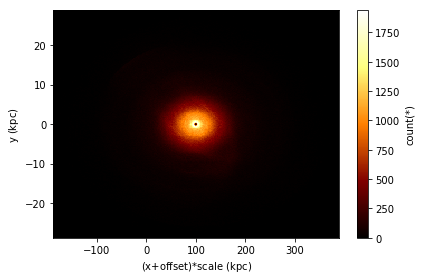

In [46]:
#ds.units["offset"] = ds.units["x"]
ds.plot("(x+offset)*scale", "y")

# Units
Based on astropy.units

In [47]:
import astropy.units as u
import numpy as np

In [48]:
x = np.arange(10)

In [49]:
x * u.km/u.s# + x * u.km

<Quantity [ 0., 1., 2., 3., 4., 5., 6., 7., 8., 9.] km / s>

In [50]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
x = np.arange(1,10.)
y = x**2.
ds_units = vaex.from_arrays(x=x, y=y)

In [52]:
ds_units.units["x"] = u.km
ds_units.units["y"] = u.s

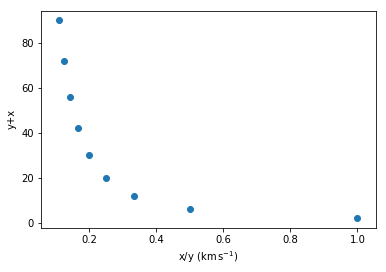

In [53]:
# x + y won't have units, since they don't add up
ds_units.scatter("x/y", "y+x")

# Importing/exporting/converting

In [54]:
ds.export_hdf5('test.hdf5', selection='x > 0', progress=True)

exporting: 100% |#############################################################################################| Time: 0:00:02 CPU Usage:    38%


In [55]:
df = ds.to_pandas_df(selection='x > 0')

In [56]:
%%time
df.to_csv("test.csv")

CPU times: user 41.4 s, sys: 1.88 s, total: 43.3 s
Wall time: 52.3 s


In [57]:
ls -alh test.*

-rw-r--r--@ 1 maartenbreddels  staff   228M Apr  3 10:24 test.csv
-rw-r--r--@ 1 maartenbreddels  staff   125M Apr  3 10:23 test.hdf5


In [58]:
!rm test.csv test.hdf5

## Shuffling
If you have large datasets, and you want to have a random sample

In [59]:
ds.export_hdf5('shuffled.hdf5', shuffle=True)

In [60]:
ds_shuffled = vaex.open('shuffled.hdf5')

In [61]:
ds_shuffled.set_active_fraction(0.1) # use 10 percent
ds_shuffled.set_active_range(1000, 1000*2) # or use rows 1000 till 2000

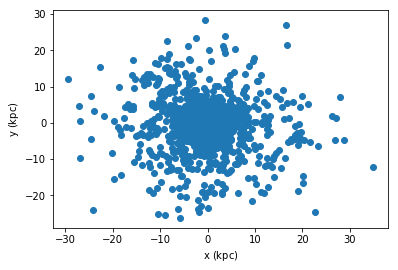

In [62]:
# small enough to do a scatter plot
ds_shuffled.scatter("x", "y")

In [63]:
ds_shuffled.export_hdf5("mini.hdf5")

In [64]:
!ls -alh mini.hdf5

-rw-r--r--@ 1 maartenbreddels  staff   102K Apr  3 10:24 mini.hdf5


In [65]:
# vaex.from_samp()

In [66]:
#pleiades = _

In [67]:
#pleiades.scatter("parallax", "pmdec")
# pleiades.add_virtual_columns_distance_from_parallax()
# pleiades.scatter("distance", "sqrt(pmdec**2+pmra**2)")

In [68]:
#pleiades.export_hdf5("pleiades.hdf5")

In [69]:
#!ls -alh pleiades.hdf5

# Advanced plotting

In [71]:
# ds.plot([])

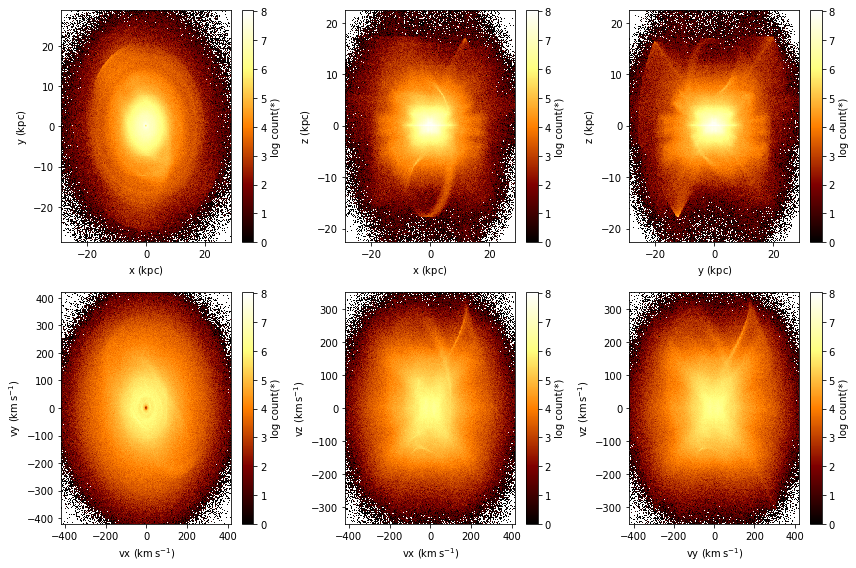

In [72]:
ds.plot([["x", "y"], ["x", "z"], ["y", "z"], ["vx", "vy"], ["vx", "vz"], ["vy", "vz"]],
        figsize=(12,8), wrap_columns=3, f="log")

In [73]:
all = ds.combinations()
all

[('E', 'FeH'),
 ('E', 'L'),
 ('E', 'Lz'),
 ('E', 'vx'),
 ('E', 'vy'),
 ('E', 'vz'),
 ('E', 'x'),
 ('E', 'y'),
 ('E', 'z'),
 ('FeH', 'L'),
 ('FeH', 'Lz'),
 ('FeH', 'vx'),
 ('FeH', 'vy'),
 ('FeH', 'vz'),
 ('FeH', 'x'),
 ('FeH', 'y'),
 ('FeH', 'z'),
 ('L', 'Lz'),
 ('L', 'vx'),
 ('L', 'vy'),
 ('L', 'vz'),
 ('L', 'x'),
 ('L', 'y'),
 ('L', 'z'),
 ('Lz', 'vx'),
 ('Lz', 'vy'),
 ('Lz', 'vz'),
 ('Lz', 'x'),
 ('Lz', 'y'),
 ('Lz', 'z'),
 ('vx', 'vy'),
 ('vx', 'vz'),
 ('vx', 'x'),
 ('vx', 'y'),
 ('vx', 'z'),
 ('vy', 'vz'),
 ('vy', 'x'),
 ('vy', 'y'),
 ('vy', 'z'),
 ('vz', 'x'),
 ('vz', 'y'),
 ('vz', 'z'),
 ('x', 'y'),
 ('x', 'z'),
 ('y', 'z')]

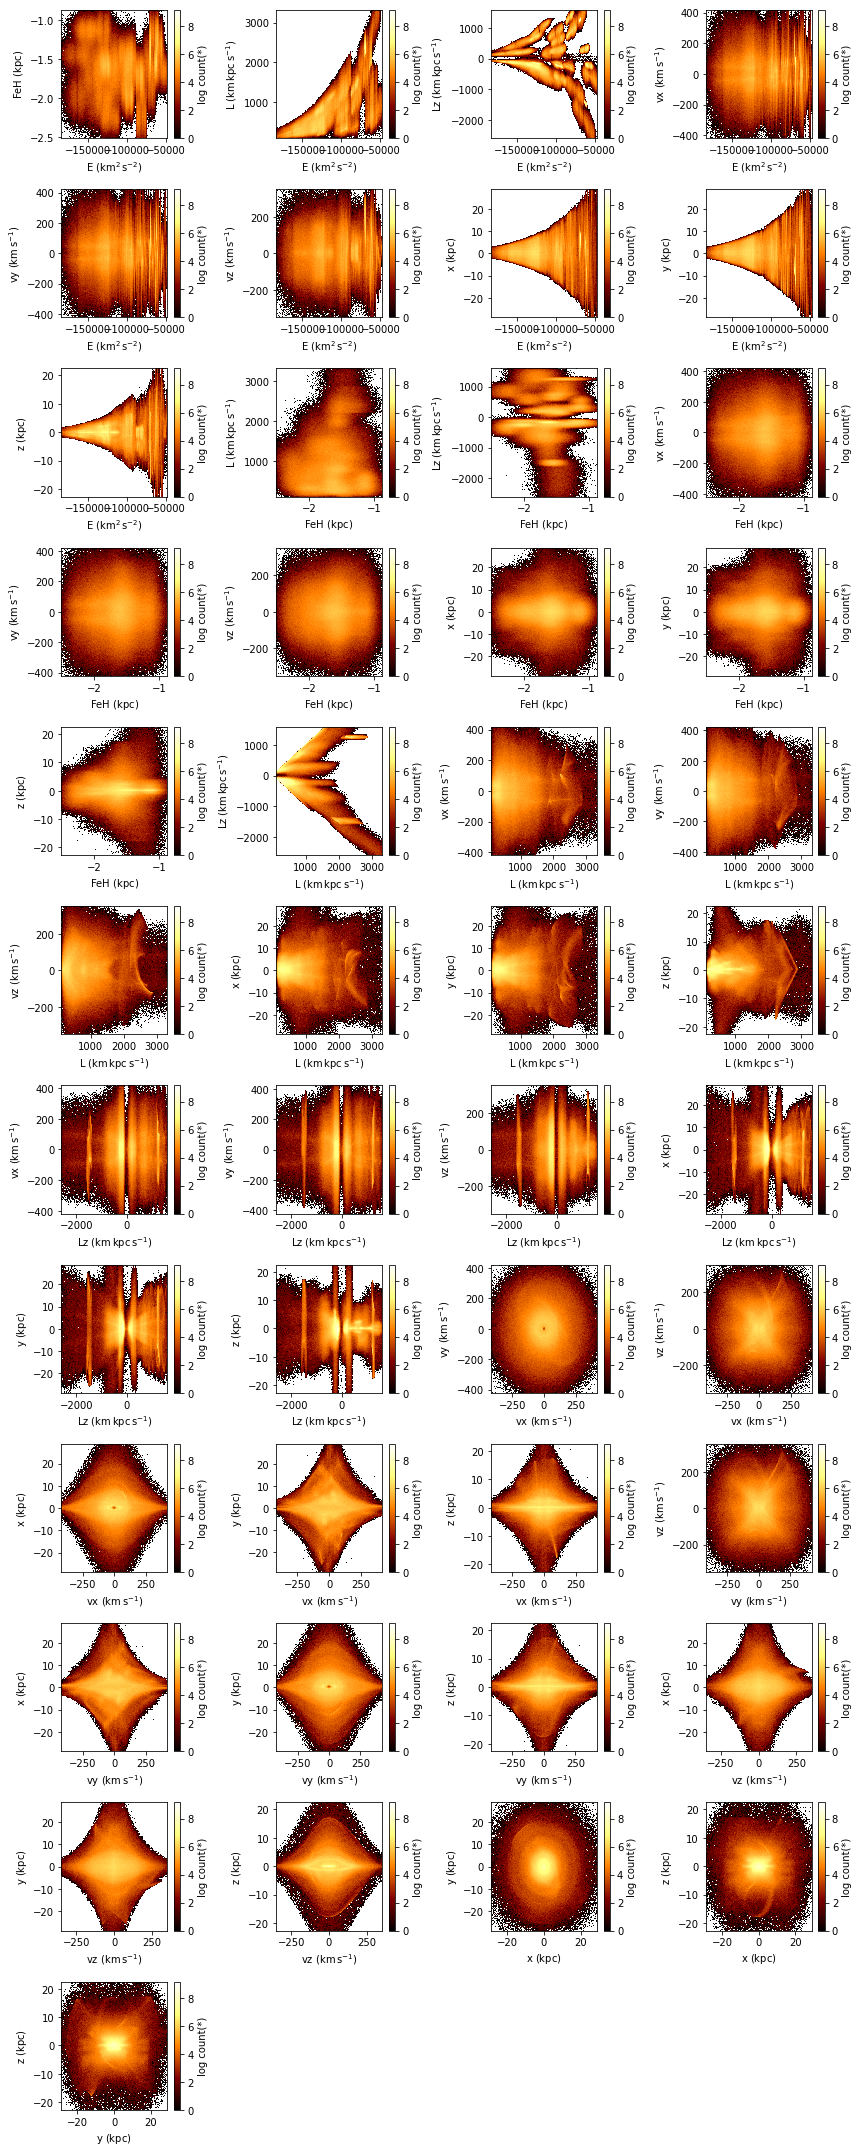

In [74]:
ds.plot(all, figsize=(12,30), f="log")

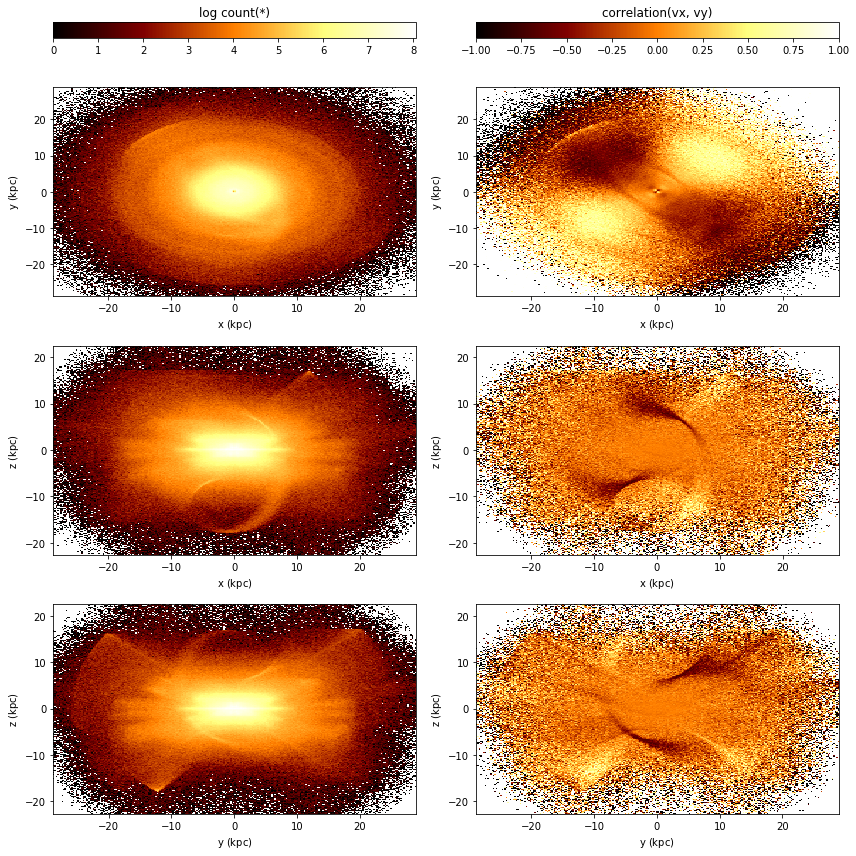

In [75]:
ds.plot([["x", "y"], ["x", "z"], ["y", "z"]], what=["count(*)", "correlation(vx, vy)"],
        figsize=(12,12), f=["log", None])

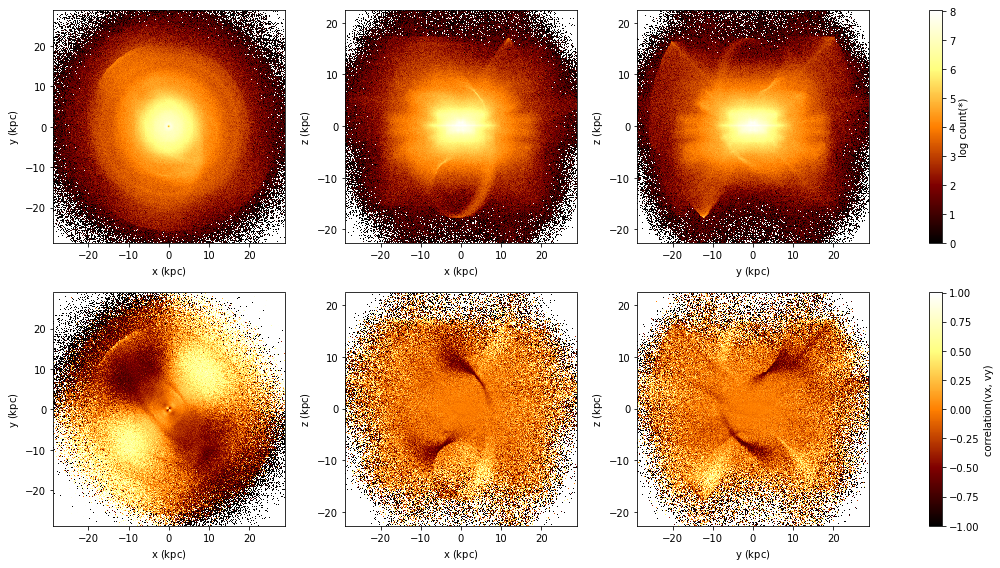

In [76]:
ds.plot([["x", "y"], ["x", "z"], ["y", "z"]], what=["count(*)", "correlation(vx, vy)"],
        figsize=(14,8), f=["log", None], visual={'row': 'what', 'column':'subspace'})

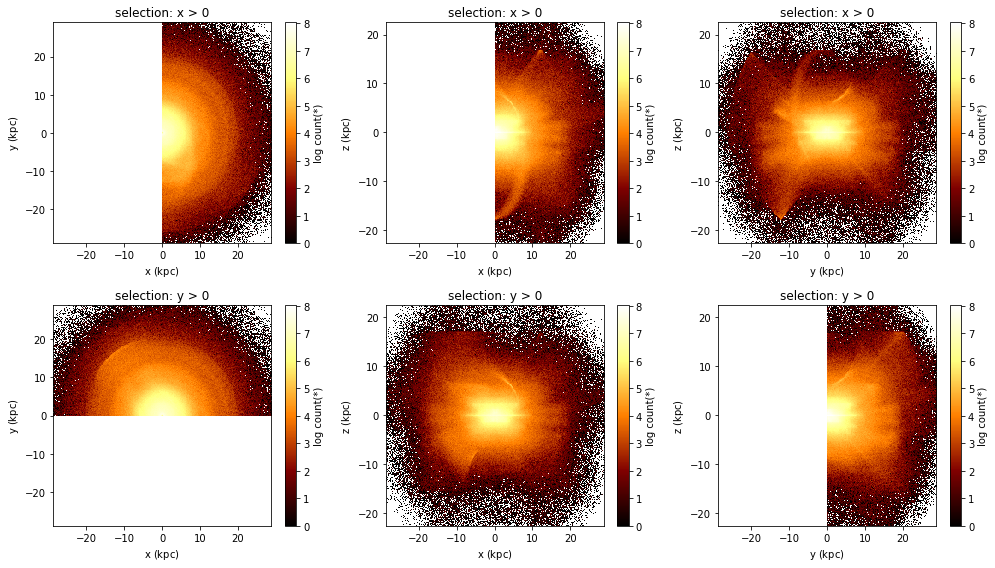

In [77]:
ds.plot([["x", "y"], ["x", "z"], ["y", "z"]], selection=["x > 0", "y > 0"],
        figsize=(14,8), f="log", visual={'row': 'selection', 'column':'subspace'})

In [78]:
# ds.plot([["x", "y"], ["x", "z"]], selection=["x > 0", "y > 0"],
#         figsize=(12,6), f="log", visual={'fade':'subspace'})

# Scatter plots
If you end up having a small selection

In [79]:
ds.count(selection="Lz > 1600")

3882.0

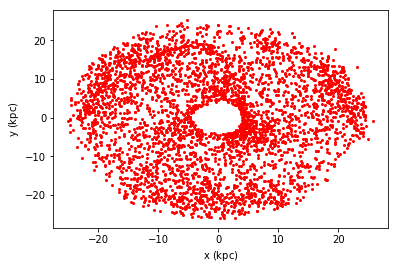

In [80]:
ds.scatter("x", "y", selection="Lz > 1600", s=4, c="red")

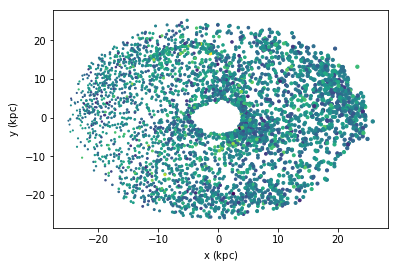

In [81]:
ds.scatter("x", "y", selection="Lz > 1600", c_expr="FeH", s_expr="(x+30)/5")

In [82]:
ds_small = ds.to_copy(selection="Lz > 1600",)

In [83]:
import matplotlib.pylab as plt

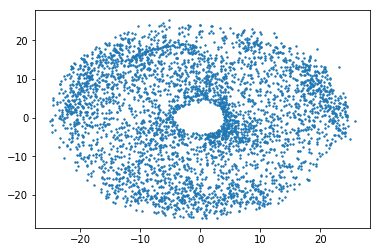

In [84]:
plt.scatter("x", "y",data=ds_small, s=2)

# Combine with Qt

In [ ]:
import vaex.ui.qt

In [ ]:
%gui qt

In [ ]:
app = vaex.app()

In [ ]:
app.add(ds)

In [ ]:
ds.plot("x", "y", selection=[False, True], f="log")